## 练习1
- 并列显示两张子图
- 第一张为 dog.jpg 原图灰度图
- 第二张为 dog.jpg 灰度图被添加噪音后的图像
  - 要求噪音值符合 20倍 标准正太分布

In [3]:
#TODO
import matplotlib.pyplot as plt
import numpy as np
import cv2

# 加载原始图像
img = cv2.imread('dog.jpg', cv2.IMREAD_GRAYSCALE)

# 添加噪音
noise = np.random.normal(0, 20, size=img.shape)
noisy_img = img + noise

# 创建子图
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# 显示原始图像
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')

# 显示添加噪音后的图像
axs[1].imshow(noisy_img, cmap='gray')
axs[1].set_title('Noisy Image')

# 去除子图的坐标轴
for ax in axs:
    ax.axis('off')

# 调整子图之间的间距
plt.tight_layout()

# 显示图像
plt.show()

ModuleNotFoundError: No module named 'matplotlib'

## 练习2
- 计算`dog.jpg`的三个通道的
    - max 最大值
    - min 最小值
    - mean 平均值
    - std 标准差
    - 25% 分位数
    - 50% 分位数
    - 70% 分位数
- 请使用`tabulate`[[链接](https://zzutai.wolai.com/5Gn4c94kEfpWBekczG5gZ)]实现以下效果
```txt
+------+--------------------+--------------------+--------------------+
| meta | R                  | G                  | B                  |
+------+--------------------+--------------------+--------------------+
| max  | 255                | 255                | 255                |
+------+--------------------+--------------------+--------------------+
| min  | 0                  | 0                  | 0                  |
+------+--------------------+--------------------+--------------------+
| mean | 181.421051         | 169.47528066666666 | 151.87428366666666 |
+------+--------------------+--------------------+--------------------+
| std  | 61.430459500391734 | 69.71584693328025  | 83.18132740623544  |
+------+--------------------+--------------------+--------------------+
| 25%  | 144.0              | 121.0              | 79.0               |
+------+--------------------+--------------------+--------------------+
| 50%  | 198.0              | 192.0              | 189.0              |
+------+--------------------+--------------------+--------------------+
| 75%  | 228.0              | 224.0              | 222.0              |
+------+--------------------+--------------------+--------------------+
```

In [4]:
#TODO
from PIL import Image
import numpy as np
from tabulate import tabulate

# 读取图片并转换为numpy数组
img = Image.open("dog.jpg")
img_array = np.array(img)

# 计算每个通道的最大值、最小值、平均值、标准差以及分位数
max_values = np.max(img_array, axis=(0, 1))
min_values = np.min(img_array, axis=(0, 1))
mean_values = np.mean(img_array, axis=(0, 1))
std_values = np.std(img_array, axis=(0, 1))
percentile_25 = np.percentile(img_array, 25, axis=(0, 1))
percentile_50 = np.percentile(img_array, 50, axis=(0, 1))
percentile_75 = np.percentile(img_array, 75, axis=(0, 1))

# 生成表格数据
table_data = [
    ["max", max_values[0], max_values[1], max_values[2]],
    ["min", min_values[0], min_values[1], min_values[2]],
    ["mean", mean_values[0], mean_values[1], mean_values[2]],
    ["std", std_values[0], std_values[1], std_values[2]],
    ["25%", percentile_25[0], percentile_25[1], percentile_25[2]],
    ["50%", percentile_50[0], percentile_50[1], percentile_50[2]],
    ["75%", percentile_75[0], percentile_75[1], percentile_75[2]],
]

# 使用tabulate生成表格
table = tabulate(table_data, headers=["meta", "R", "G", "B"], tablefmt="grid")
print(table)

+--------+----------+----------+----------+
| meta   |        R |        G |        B |
+========+==========+==========+==========+
| max    | 255      | 255      | 255      |
+--------+----------+----------+----------+
| min    |   0      |   0      |   0      |
+--------+----------+----------+----------+
| mean   | 181.423  | 169.476  | 151.877  |
+--------+----------+----------+----------+
| std    |  61.4472 |  69.7245 |  83.2211 |
+--------+----------+----------+----------+
| 25%    | 144      | 121      |  79      |
+--------+----------+----------+----------+
| 50%    | 198      | 192      | 189      |
+--------+----------+----------+----------+
| 75%    | 228      | 224      | 222      |
+--------+----------+----------+----------+


## 练习3
- 并列显示两张子图
- 第一张为 dog.jpg 原图RGB图
- 第二张为 dog.jpg RGB图被添加噪音后的图像
  - 要求噪音值符合 20倍 标准正太分布
- 注意: 有可能需要对加上噪音的彩图进行极小极大值归一 [[链接](https://zzutai.wolai.com/23rRgaWcBJif4xw1Tww3kt)] ，否则会超出可视范围导致图像显示不正常

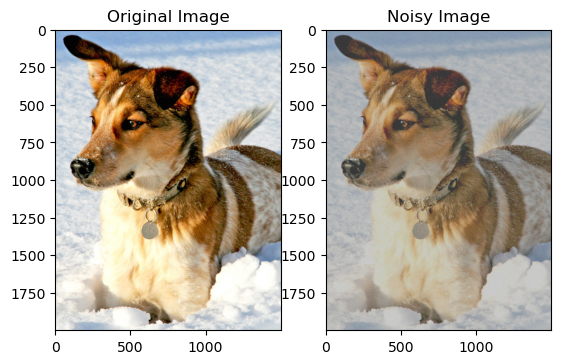

In [8]:
#TODO

# 读取图像并转换为RGB格式
img = Image.open('dog.jpg').convert('RGB')
img_array = np.array(img)

# 生成符合20倍标准正态分布的噪音
noise = 20 * np.random.normal(size=img_array.shape)

# 将噪音添加到RGB图像上
noisy_img_array = img_array + noise

# 对加上噪音的彩图进行极小极大值归一化处理
noisy_img_array = (noisy_img_array - noisy_img_array.min()) / (noisy_img_array.max() - noisy_img_array.min())

# 显示原图
plt.subplot(1, 2, 1)
plt.imshow(img_array)
plt.title('Original Image')

# 显示添加噪音后的图像
plt.subplot(1, 2, 2)
plt.imshow(noisy_img_array)
plt.title('Noisy Image')

# 显示图像
plt.show()

## 练习4
- 显示3行子图
- 第一行：`dog.jpg`RGB原图、第二行图合成RGB图，第三行图合成RGB图
- 第二行：R、G、B三通道彩图
- 第三行：R、G、B单通道灰度图

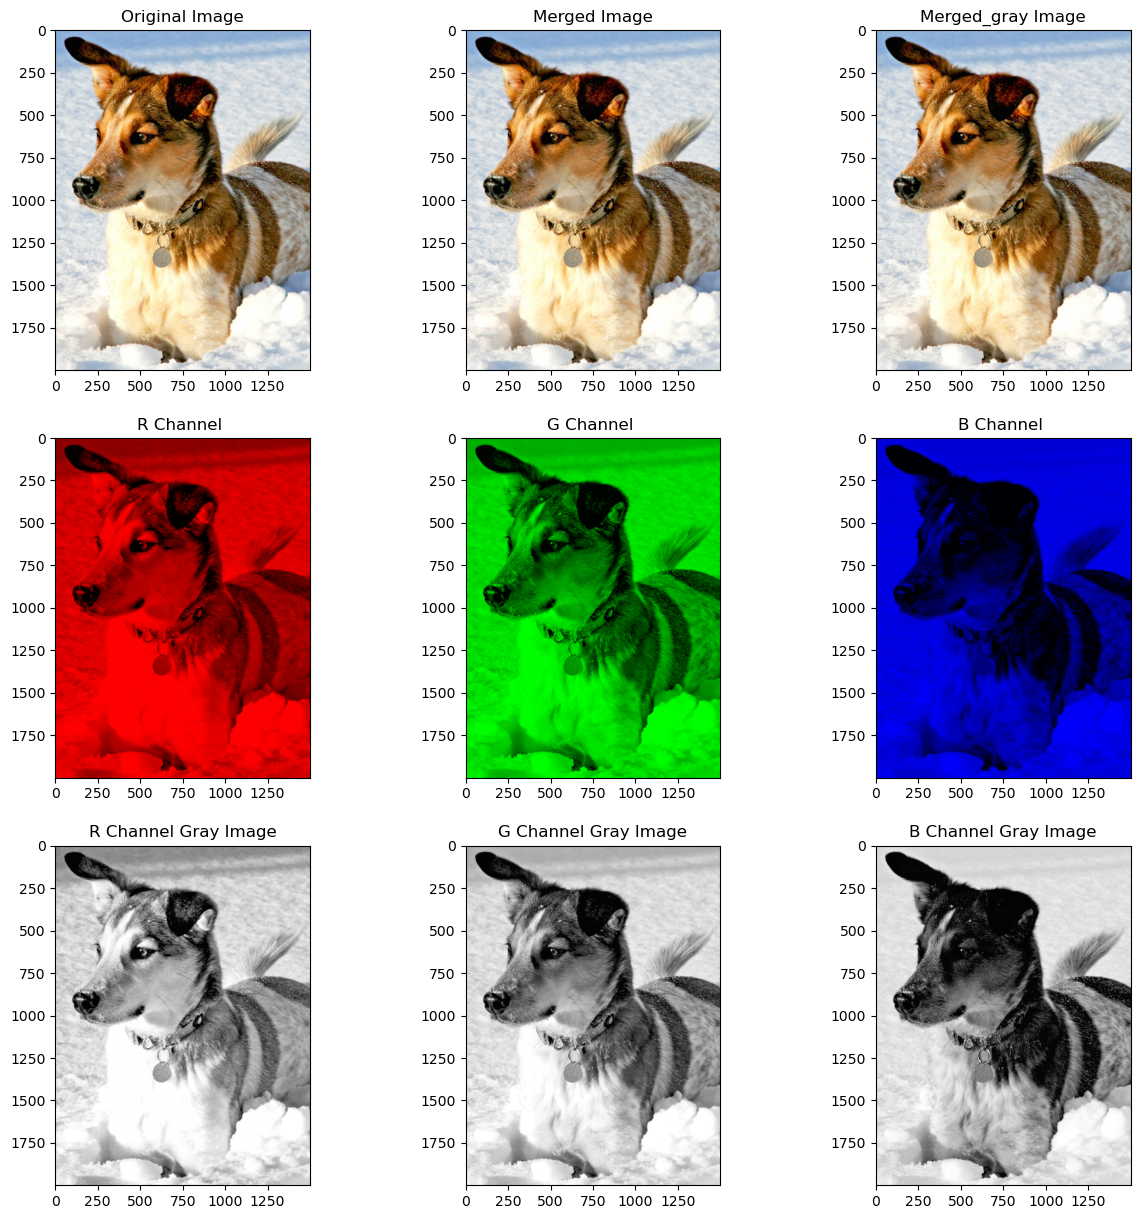

In [17]:
#TODO
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 使用Image.open()函数读取图片
img_rgb = Image.open("dog.jpg")

# 将图片转化为数组
img_np = np.array(img_rgb)


#分离RGB三通道

r, g, b = img_np[:, :, 0], img_np[:, :, 1], img_np[:, :, 2]


#创建RGB三通道彩图

r_img = np.zeros_like(img_np)
r_img[:, :, 0] = r
g_img = np.zeros_like(img_np)
g_img[:, :, 1] = g
b_img = np.zeros_like(img_np)
b_img[:, :, 2] = b

#RGB单通道灰度图
r_gray = Image.fromarray(r).convert("L")
g_gray = Image.fromarray(g).convert("L")
b_gray = Image.fromarray(b).convert("L")

# 创建画布
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# 第一行：RGB原图、第二行图合成RGB图，第三行图合成RGB图
axs[0, 0].imshow(img_rgb)
axs[0, 0].set_title("Original Image")

img_new_rgb = np.dstack((r, g, b))
axs[0, 1].imshow(img_new_rgb)
axs[0, 1].set_title("Merged Image")

img_new_rgb_gray = np.dstack((r_gray, g_gray, b_gray))
axs[0, 2].imshow(img_new_rgb_gray)
axs[0, 2].set_title("Merged_gray Image")

# 第二行：R、G、B三通道彩图
axs[1, 0].imshow(r_img)
axs[1, 0].set_title("R Channel ")
axs[1, 1].imshow(g_img)
axs[1, 1].set_title("G Channel ")
axs[1, 2].imshow(b_img)
axs[1, 2].set_title("B Channel ")

# 第三行：R、G、B单通道灰度图
axs[2, 0].imshow(r_gray, cmap='gray')
axs[2, 0].set_title("R Channel Gray Image")
axs[2, 1].imshow(g_gray, cmap='gray')
axs[2, 1].set_title("G Channel Gray Image")
axs[2, 2].imshow(b_gray, cmap='gray')
axs[2, 2].set_title("B Channel Gray Image")

plt.show()

## 练习5
- 使用`monkey.jpg`作为前景, `moon.jpg`作为背景，实现以下特效
- 请注意不要使用任何形式的`for`循环，仅使用numpy(比较)运算实现以下效果

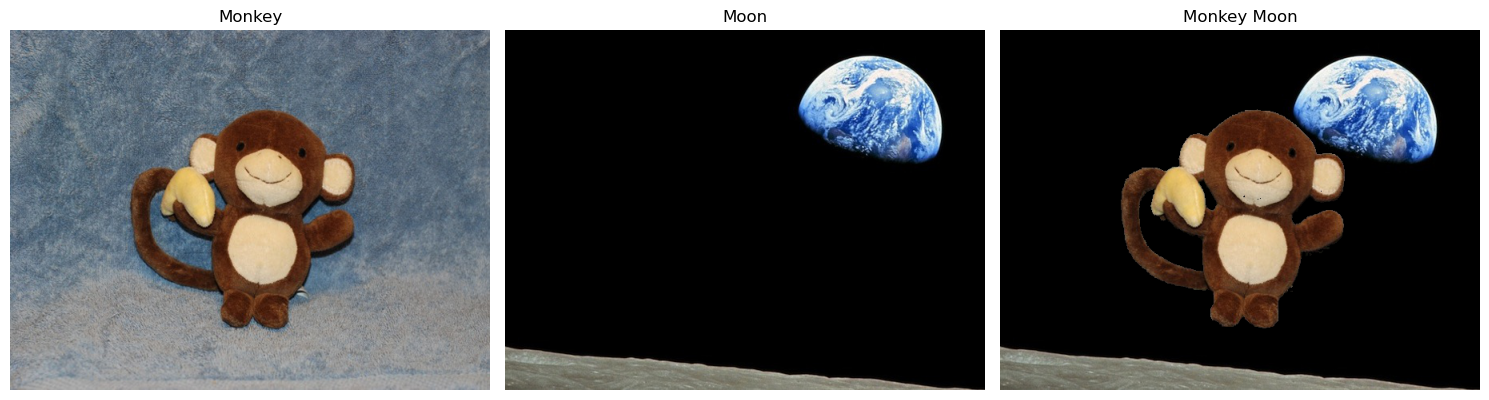

In [20]:
#TODO
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# 加载图像
monkey_img = Image.open("monkey.jpg")
moon_img = Image.open("moon.jpg")

# 调整图像大小以匹配
moon_size = moon_img.size
monkey_img = monkey_img.resize(moon_size)

# 将图像转换为NumPy数组
monkey_arr = np.array(monkey_img)
moon_arr = np.array(moon_img)

# 计算平均值
avg = monkey_arr.mean(axis=2)

# 根据条件替换像素值
mask = (monkey_arr[:,:,2] < 0.9 * avg)
moon_arr[mask] = monkey_arr[mask]

# 将NumPy数组转换回Image对象
result_img = Image.fromarray(moon_arr.astype('uint8'))

# 创建画布
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# 显示原始图像
axs[0].imshow(monkey_img)
axs[0].set_title("Monkey")

# 显示背景图像
axs[1].imshow(moon_img)
axs[1].set_title("Moon")

# 显示合成图像
axs[2].imshow(result_img)
axs[2].set_title("Monkey Moon")

# 去除子图的坐标轴
for ax in axs:
    ax.axis('off')

# 调整子图之间的间距
plt.tight_layout()

# 显示图像
plt.show()

# 练习6

- 参考[使用形态学变化实现植物图像的骨架提取](https://www.wolai.com/www_family/dwWbn5KF9Xd46a483D7fAa#rasK49LAAvSfwihtxGQwKt)代码
- 不使用`bitwise_xor`，达到同样效果
- 提示：要用`np.bitwise_not`和`np.bitwise_and`的组合来尝试模拟`XOR`

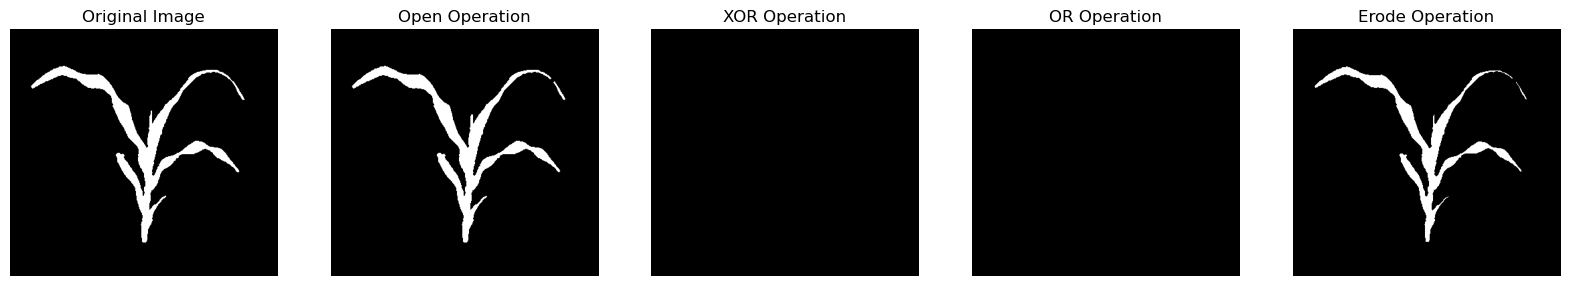

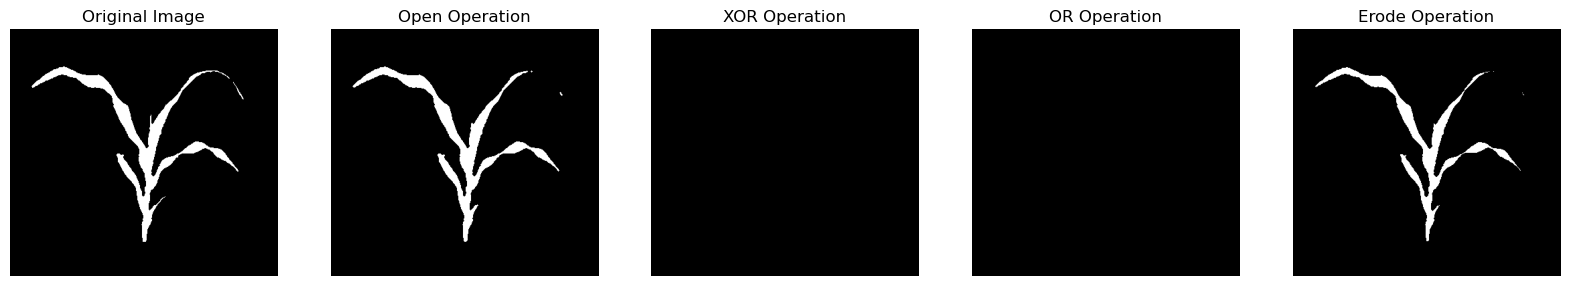

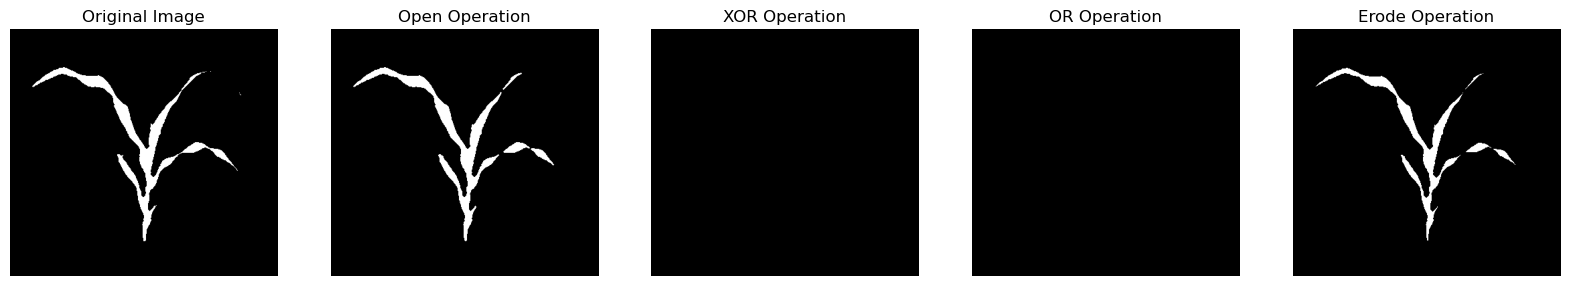

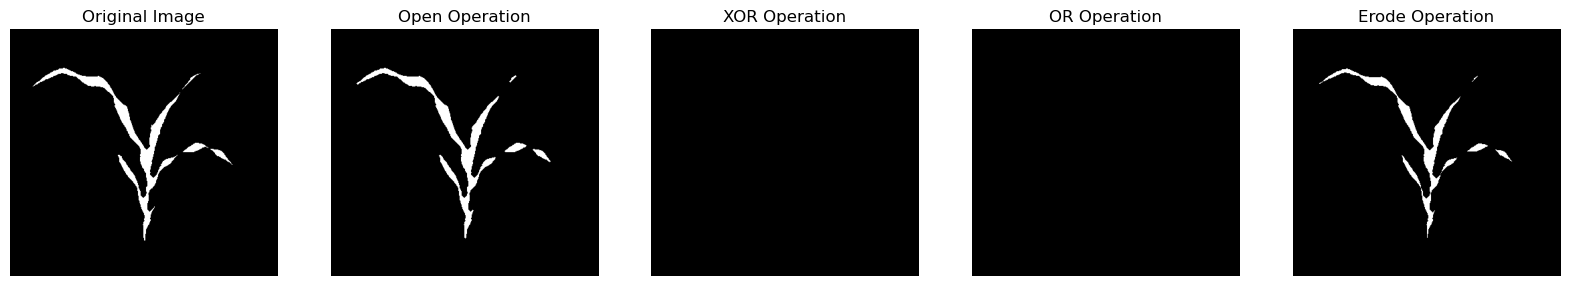

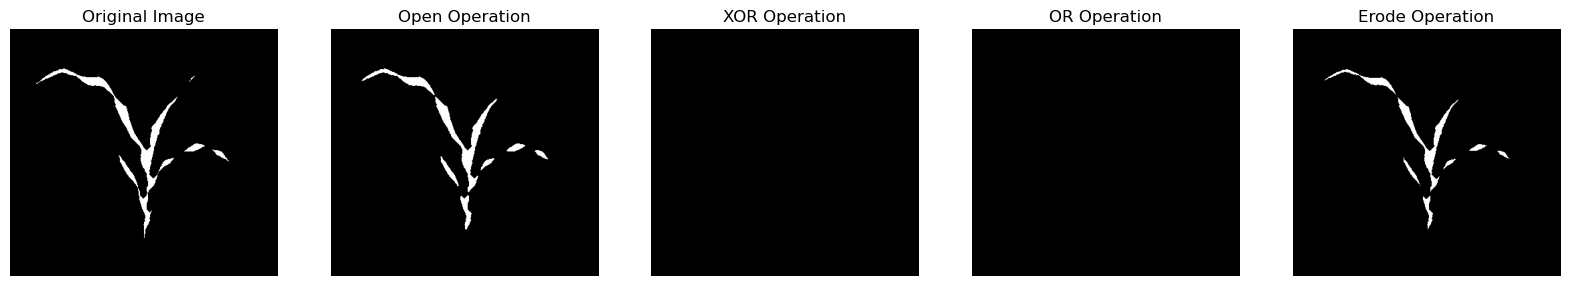

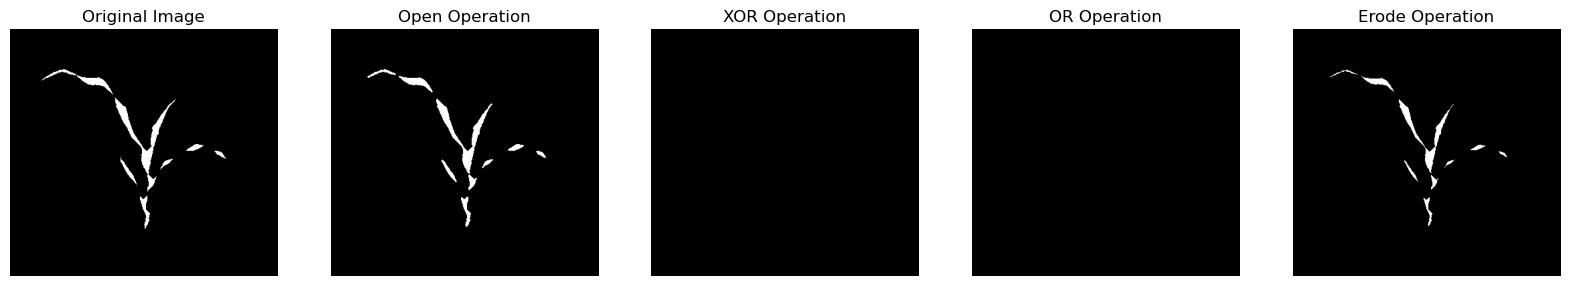

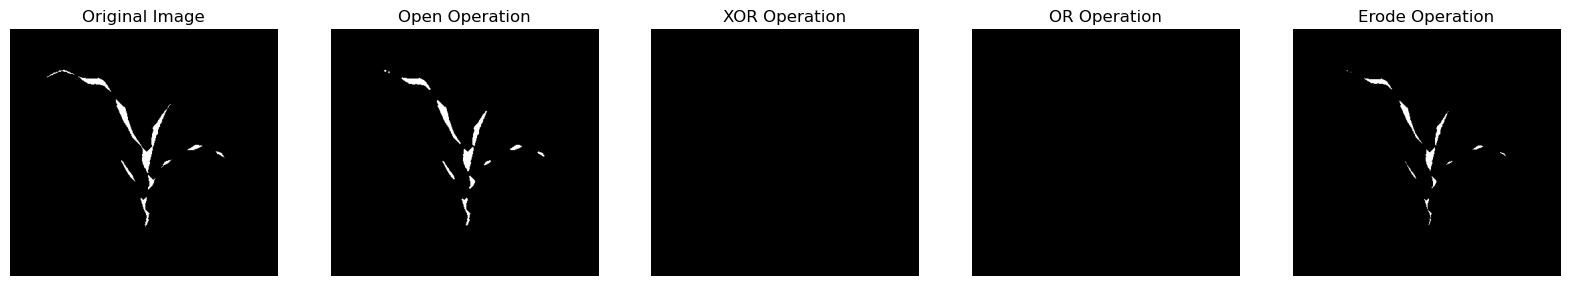

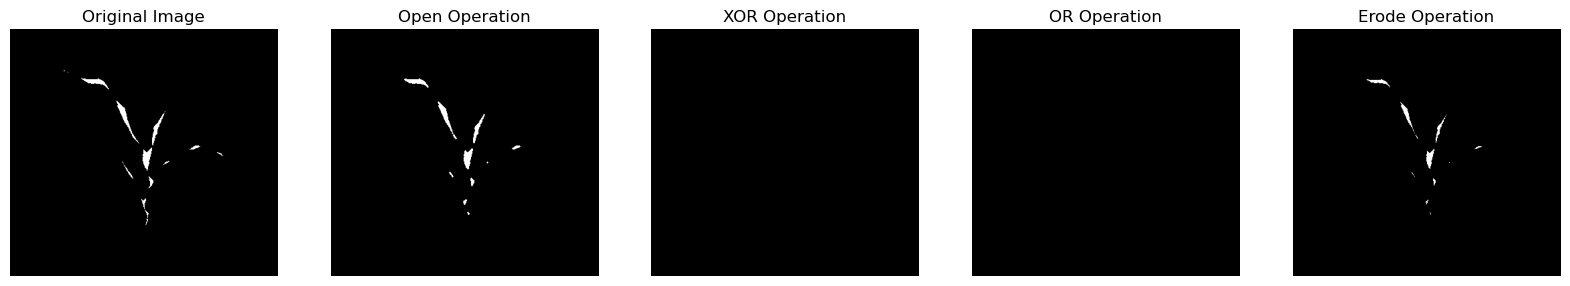

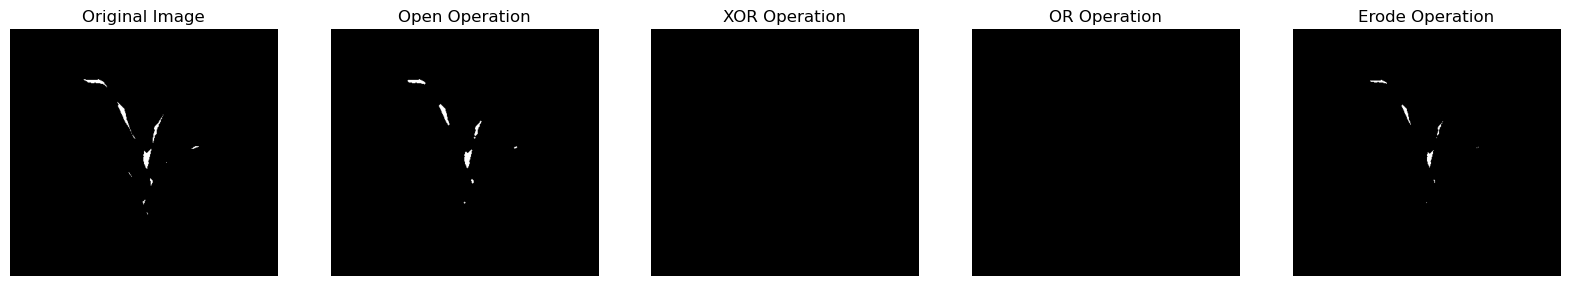

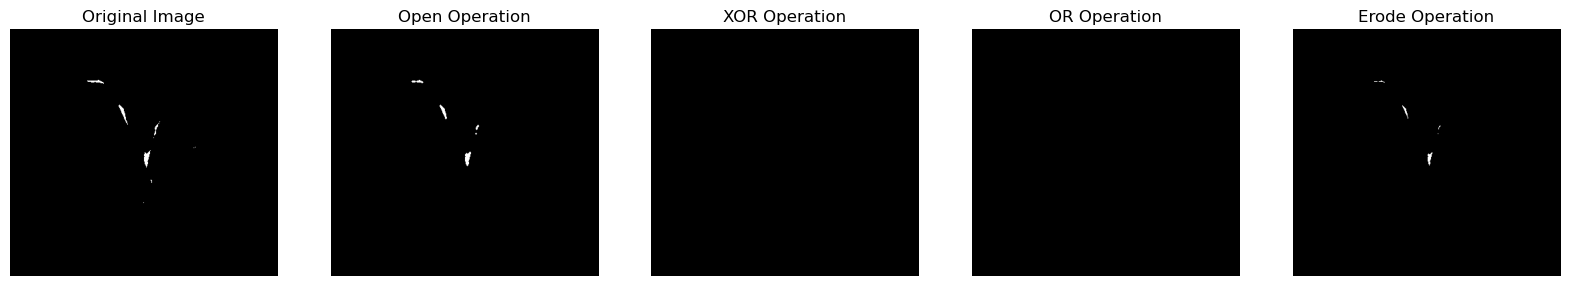

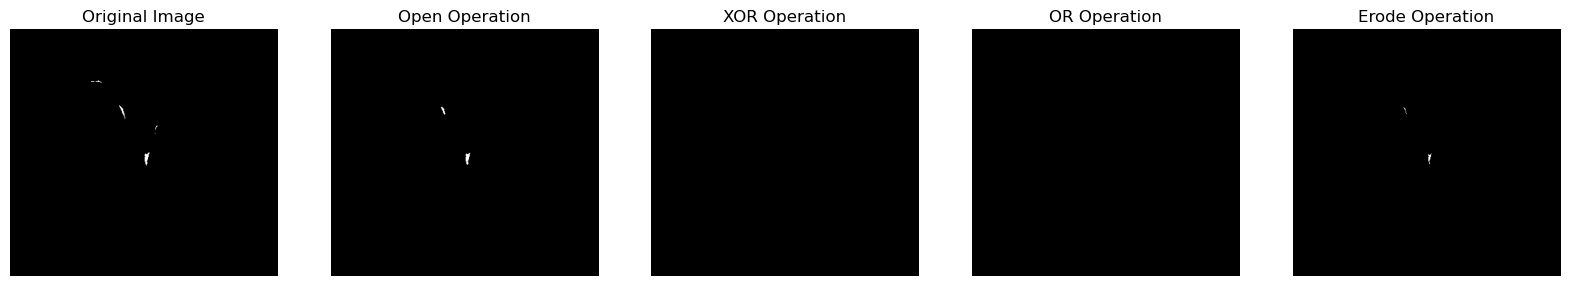

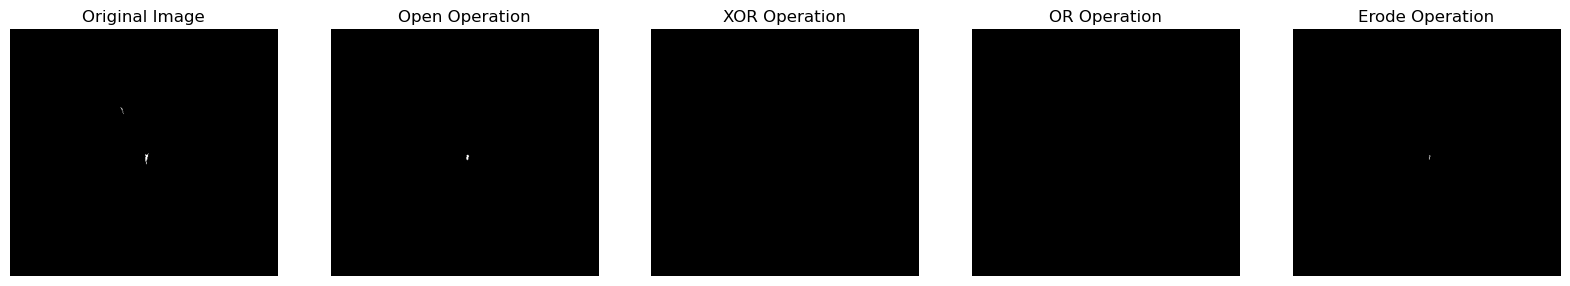

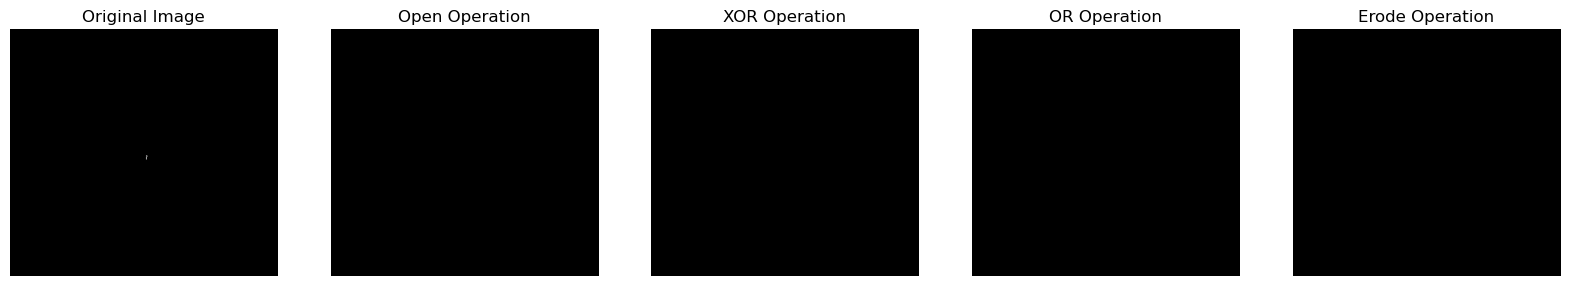

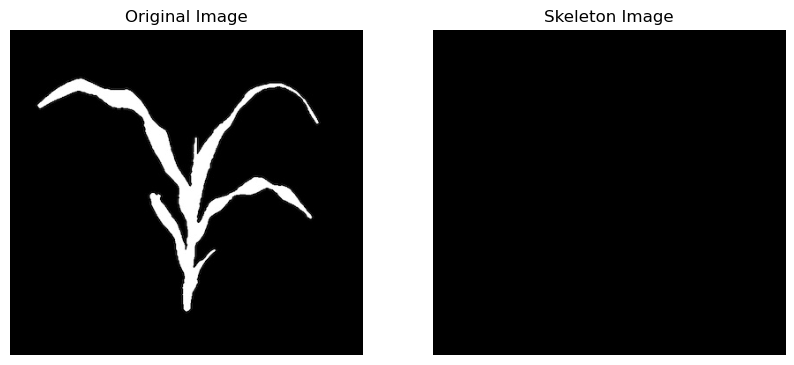

In [12]:
#TODO
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图像并转换为二值图像
img = cv2.imread("plant.png", 0)  # 以灰度模式读取图像
img_copy = img.copy()  # 创建原始图像的副本，用于最后的显示
_, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)  # 对图像进行二值化处理，阈值为127

# 创建骨架图像和临时图像
skel = np.zeros(img.shape, np.uint8)  # 创建一个与原始图像大小相同的空骨架图像
temp = np.zeros(img.shape, np.uint8)  # 创建一个与原始图像大小相同的空临时图像

# 定义结构元素
element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))  # 定义一个3x3的十字形结构元素

# 主循环
done = False  # 标志变量，用于判断是否完成骨架提取
process_imgs = {}  # 用于存储处理过程中的图像

while not done:
    img_cp = img.copy()  # 创建原始图像的副本，用于显示处理过程
    fg, ax = plt.subplots(1, 5, figsize=(20, 5))  # 创建一个1行6列的子图，用于显示处理过程
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title('Original Image')

    cv2.morphologyEx(img, cv2.MORPH_OPEN, element, temp)  # 进行开操作，用来消除图像中的小白点
    ax[1].imshow(temp, cmap='gray')
    ax[1].set_title('Open Operation')

    temp = cv2.bitwise_not(cv2.bitwise_and(cv2.bitwise_not(img_cp), temp))  # 进行模拟XOR操作，用于得到图像中的小白点
    ax[2].imshow(temp, cmap='gray')
    ax[2].set_title('XOR Operation')

    skel = cv2.bitwise_or(skel, temp)  # 进行OR操作，用于得到骨架图像
    ax[3].imshow(skel, cmap='gray')
    ax[3].set_title('OR Operation')

    img = cv2.erode(img, element)  # 对原始图像进行腐蚀操作
    ax[4].imshow(img, cmap='gray')
    ax[4].set_title('Erode Operation')

    # 关闭所有子图的坐标轴显示
    for a in ax:
        a.axis('off')

    plt.show()  # 显示处理过程的子图

    done = cv2.countNonZero(img) == 0  # 判断是否完成骨架提取，当原始图像中不再有白色像素时，提取完成

fig, ax = plt.subplots(1, 2, figsize=(10, 5))  # 创建一个1行2列的子图，用于显示最终结果
ax[0].imshow(img_copy, cmap='gray')  # 显示原始图像
ax[0].set_title('Original Image')  # 设置子图标题
ax[0].axis('off')  # 关闭坐标轴显示

ax[1].imshow(skel, cmap='gray')  # 显示最终的骨架图像
ax[1].set_title('Skeleton Image')  # 设置子图标题
ax[1].axis('off')  # 关闭坐标轴显示

plt.show()  # 显示最终结果的子图